In [1]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('train.csv')

In [7]:
df.describe()

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,2.000339,1.575509,2.496280,41099.775417,0.126994
std,31841.921168,11.520378,0.804272,0.371087,2.252073,0.527631,0.689818,46166.322400,0.332968
min,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20000.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,3.000000,2.000000,3.000000,48000.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,53.000000,3.000000,3.000000,1000000.000000,1.000000


In [3]:
df

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73799 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [33]:
df.isna().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

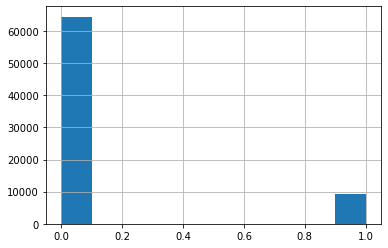

In [6]:
df['default'].hist()

In [8]:
df['education'] = df['education'].astype(str).apply(
    lambda x: None if x.strip() == ''else x)

In [9]:
df['education'].value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
nan      307
ACD      194
Name: education, dtype: int64

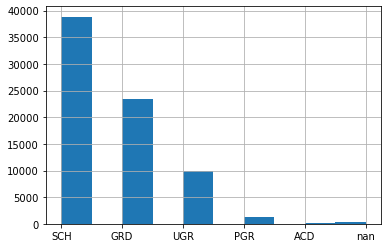

In [10]:
df['education'].hist()

In [33]:
df['education'] = df['education'].apply(lambda x:'SCH' if x == 'nan' else x)

In [90]:
df_nums = df[['age','decline_app_cnt','bki_request_cnt','income','default']]

num_cols = ['age','decline_app_cnt','bki_request_cnt','income']

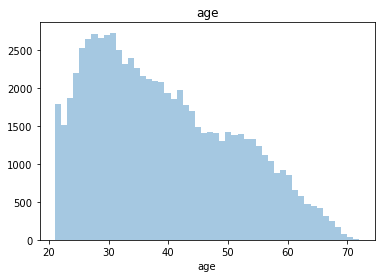

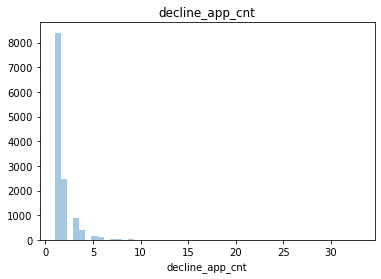

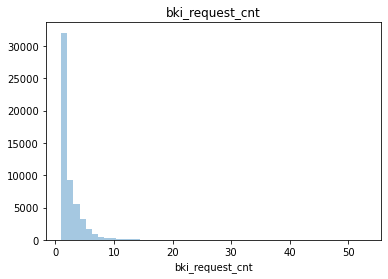

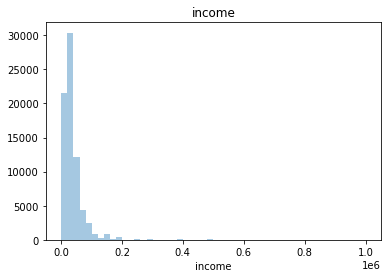

In [109]:
for i in num_cols:
    plt.figure()
    sns.distplot(df_nums[i][df_nums[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

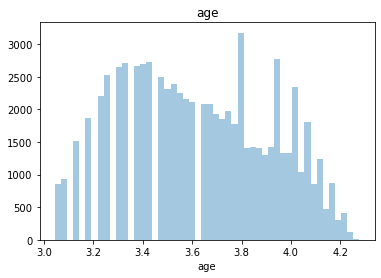

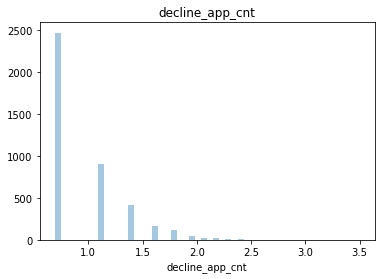

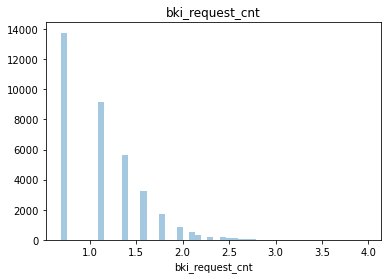

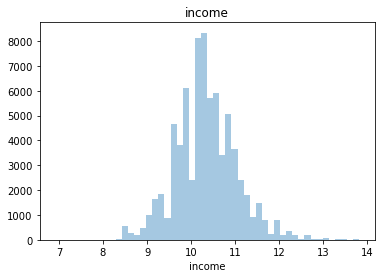

In [114]:
for i in num_cols:
    plt.figure()
    sns.distplot(np.log(df_nums[i])[np.log(df_nums[i]) > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [130]:
# plt. figure(figsize=[15, 20])

# i = 1
# y, hue = 'proportion', 'default'
# for f in num_cols:
#     plt.subplot(5, 2, i)
#     df[[f, 'default']]\
#         .value_counts(normalize=True)\
#         .rename(y)\
#         .reset_index()\
#         .pipe((sns.boxplot, 'data'), x=f, y='proportion', hue='default', alpha=0.8)
#     plt.title('Proportion of {} by default'.format(f))
#     i += 1
# plt.tight_layuot()
# plt.show

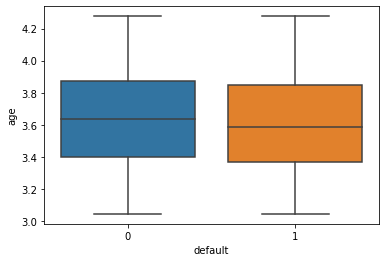

In [129]:
sns.boxplot(y= np.log(df_nums['age']),x=df_nums['default'])

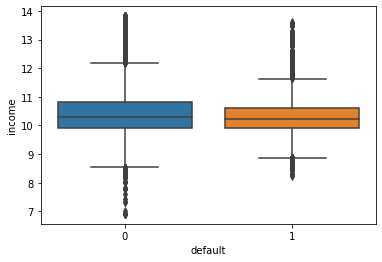

In [133]:
sns.boxplot(y= np.log(df_nums['income']),x=df_nums['default'])

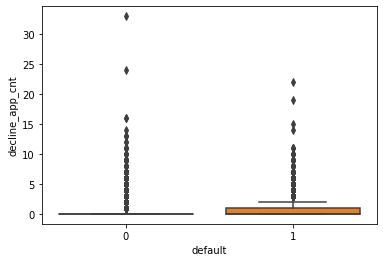

In [134]:
sns.boxplot(y= df_nums['decline_app_cnt'],x=df_nums['default'])

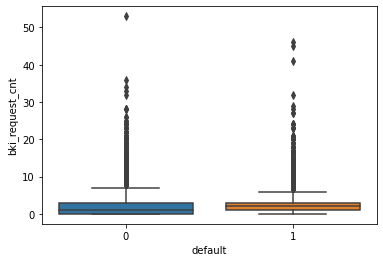

In [135]:
sns.boxplot(y= df_nums['bki_request_cnt'],x=df_nums['default'])

<ipython-input-152-619837fcbcab>:1: RuntimeWarning: divide by zero encountered in log
  sns.heatmap(np.log(df_nums[num_cols]).corr().abs(), vmin=0, vmax=1)


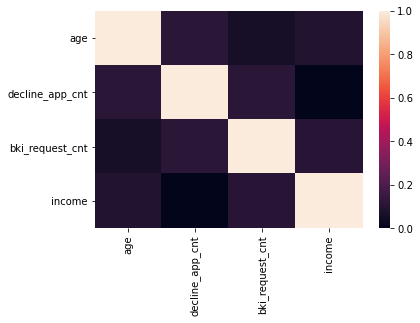

In [152]:
sns.heatmap(np.log(df_nums[num_cols]).corr().abs(), vmin=0, vmax=1)


In [143]:
np.log(df_nums[num_cols]).corr().abs()

<ipython-input-143-01d5a88a7364>:1: RuntimeWarning: divide by zero encountered in log
  np.log(df_nums[num_cols]).corr().abs()


,age,decline_app_cnt,bki_request_cnt,income
age,1.000000,0.109898,0.059753,0.091870
decline_app_cnt,0.109898,1.000000,0.112057,0.000153
bki_request_cnt,0.059753,0.112057,1.000000,0.108082
income,0.091870,0.000153,0.108082,1.000000


In [149]:
corr = np.log(df_nums[num_cols]).corr().abs()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-149-a44a2f331047>:1: RuntimeWarning: divide by zero encountered in log
  corr = np.log(df_nums[num_cols]).corr().abs()


,age,decline_app_cnt,bki_request_cnt,income
age,1.000000,0.109898,0.059753,0.091870
decline_app_cnt,0.109898,1.000000,0.112057,0.000153
bki_request_cnt,0.059753,0.112057,1.000000,0.108082
income,0.091870,0.000153,0.108082,1.000000
